# Sequential model

2.3.0
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(28, 28)
5


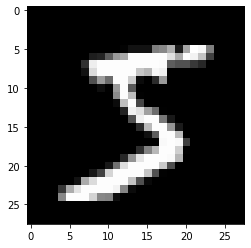

In [1]:
# 載入MNIST
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


# 呈現index為0的圖片
import matplotlib.pyplot as plt
print(x_train[0].shape)
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')

In [2]:
# Sequential model教學
from tensorflow import keras
from tensorflow.keras import layers


# Convert to float then Normalization
x_train = x_train.reshape(60000, 784).astype("float32") / 255.0
x_test = x_test.reshape(10000, 784).astype("float32") / 255.0
print(x_train.shape)
print(y_train.shape)


model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(32, activation="sigmoid"))
model.add(layers.Dense(16, activation="sigmoid"))
model.add(layers.Dense(8, activation="sigmoid"))
model.add(layers.Dense(16, activation="sigmoid"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

(60000, 784)
(60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 26,098
Trainable params: 26,098
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Model compile
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 2.2420 - accuracy: 0.1838 - val_loss: 2.1712 - val_accuracy: 0.2131
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 2.0816 - accuracy: 0.4046 - val_loss: 2.0149 - val_accuracy: 0.4757
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 1.9720 - accuracy: 0.5464 - val_loss: 1.9358 - val_accuracy: 0.5907
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 1.8842 - accuracy: 0.6279 - val_loss: 1.8392 - val_accuracy: 0.6576
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 1.8142 - accuracy: 0.6659 - val_loss: 1.7985 - val_accuracy: 0.6678
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 1.7732 - accuracy: 0.7273 - val_loss: 1.7458 - val_accuracy: 0.7444
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 1.7296 - accuracy: 0.7496 - val_loss: 1.7178 - val_accuracy: 0.7531
Epoch 

In [4]:
# Model evaluate
test_scores = model.evaluate(x_test, y_test, verbose=2)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.6312 - accuracy: 0.8376
Test loss: 1.6312404870986938
Test accuracy: 0.8375999927520752


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
result: [7 2 1]


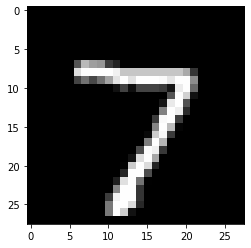

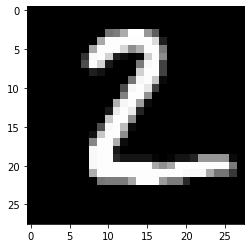

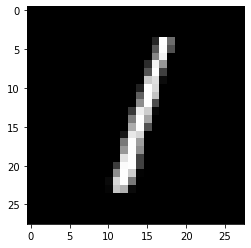

In [5]:
# Model predict
sample_index = 0
#print(x_test.shape)
#print(x_test[sample_index].shape)
#print(x_test[sample_index:sample_index+1].shape)

predict_result = model.predict_classes(x_test[sample_index:sample_index+3])
print("result:",predict_result)


plt.imshow(x_test[sample_index].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(x_test[sample_index+1].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(x_test[sample_index+2].reshape(28,28), cmap='gray')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Model_MNIST_V1/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              

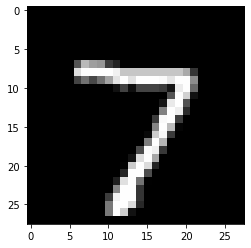

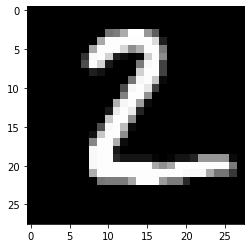

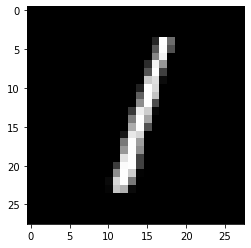

In [6]:
# Model save & load
model.save('Model_MNIST_V1')

model2 = keras.models.load_model('Model_MNIST_V1')
model2.summary()

# Model predict
sample_index = 0
#print(x_test.shape)
#print(x_test[sample_index].shape)
#print(x_test[sample_index:sample_index+1].shape)

predict_result = model2.predict_classes(x_test[sample_index:sample_index+3])
print("result:",predict_result)


plt.imshow(x_test[sample_index].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(x_test[sample_index+1].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(x_test[sample_index+2].reshape(28,28), cmap='gray')

**Practice, using more neurons**

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))




model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.7955 - accuracy: 0.6760 - val_loss: 1.5889 - val_accuracy: 0.8787
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5665 - accuracy: 0.9003 - val_loss: 1.5532 - val_accuracy: 0.9106
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5423 - accuracy: 0.9213 - val_loss: 1.5422 - val_accuracy: 0.9208
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5300 - accuracy: 0.9335 - val_loss: 1.5314 - val_accuracy: 0.9313
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5242 - accuracy: 0.9386 - val_loss: 1.5320 - val_accuracy: 0.9308
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5187 - accuracy: 0.9435 - val_loss: 1.5246 - val_accuracy: 0.9368
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5159 - accuracy: 0.9459 - val_loss: 1.5234 - val_accuracy: